In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import tensorflow
import nilearn

from niwidgets import NiftiWidget

In [71]:
import k3d

In [63]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi


## Load and Visualize the Data

In [4]:
mri_path = 'data/mri_crop/'

left_stn_path = 'data/mask_left/'

right_stn_path = 'data/mask_right/'


patients = [f for f in os.listdir(mri_path) if f.endswith('.img')]



In [5]:
def normalizeImageIntensityRange(img):
    
    max_intensity = np.max(img)
    min_intensity = np.min(img)
    
    return (img - min_intensity) / (max_intensity - min_intensity)



In [6]:
import cv2
def saveSlice(img, fname, path,mask=False):
    

    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [148]:
left_x=[]
left_y=[]
right_x=[]
right_y=[]

z=[]

j=1

for r in range(35,45):
    
    
    img = nib.load(os.path.join(mri_path,patients[r])).get_fdata()

    left_mask = nib.load(os.path.join(left_stn_path,patients[r])).get_fdata()
    right_mask = nib.load(os.path.join(right_stn_path,patients[r])).get_fdata()

    a,b,c = np.where((left_mask)!=0)

    e,f,g = np.where(right_mask!=0)

    left_x.append(min(a))
    left_x.append(max(a))

    left_y.append(min(b))
    left_y.append(max(b))


    right_x.append(min(e))
    right_x.append(max(e))

    right_y.append(min(f))
    right_y.append(max(f))
    
    
    #plt.figure(figsize=(14,14))
    
    for i in range(min(c),max(c)+1):
        
        
        if(np.sum(right_mask[min(e)+abs(min(e)-max(e))//2-20:min(e)+abs(min(e)-max(e))//2+20, 
                            min(f)+abs(min(f)-max(f))//2-20:min(f)+abs(min(f)-max(f))//2+20,i]))>=30:
            
            
            n_img = normalizeImageIntensityRange(img[min(e)+abs(min(e)-max(e))//2-20:min(e)+abs(min(e)-max(e))//2+20, 
                            min(f)+abs(min(f)-max(f))//2-20:min(f)+abs(min(f)-max(f))//2+20,i])
            
            #save the right stn mri slice
            
            
            saveSlice(n_img,str(patients[r])+'_slice_'+str(i),'Testing/slices/right_stn/')
            
            saveSlice(right_mask[min(e)+abs(min(e)-max(e))//2-20:min(e)+abs(min(e)-max(e))//2+20, 
                            min(f)+abs(min(f)-max(f))//2-20:min(f)+abs(min(f)-max(f))//2+20,i],
                     str(patients[r])+'_slice_'+str(i),'Testing/masks/right_stn/')

            
        if(np.sum(left_mask[min(a)+abs(min(a)-max(a))//2-20:min(a)+abs(min(a)-max(a))//2+20, 
                            min(b)+abs(min(b)-max(b))//2-20:min(b)+abs(min(b)-max(b))//2+20,i]))>=30:
            
            
            n_img = normalizeImageIntensityRange(img[min(a)+abs(min(a)-max(a))//2-20:min(a)+abs(min(a)-max(a))//2+20, 
                            min(b)+abs(min(b)-max(b))//2-20:min(b)+abs(min(b)-max(b))//2+20,i])
            
            #save the mri slice
            
            saveSlice(n_img,str(patients[r])+'_slice_'+str(i),'Testing/slices/left_stn/')
            
            saveSlice(left_mask[min(a)+abs(min(a)-max(a))//2-20:min(a)+abs(min(a)-max(a))//2+20, 
                            min(b)+abs(min(b)-max(b))//2-20:min(b)+abs(min(b)-max(b))//2+20,i],
                     str(patients[r])+'_slice_'+str(i),'Testing/masks/left_stn/')
            

        #print(np.sum(right_mask[min(e)+abs(min(e)-max(e))//2-20:min(e)+abs(min(e)-max(e))//2+20,
        #                        min(f)+abs(min(f)-max(f))//2-20:min(f)+abs(min(f)-max(f))//2+20,i]))
        #plt.subplot(4,5,j)
        #plt.imshow(right_mask[min(e)+abs(min(e)-max(e))//2-20:min(e)+abs(min(e)-max(e))//2+20,
        #                        min(f)+abs(min(f)-max(f))//2-20:min(f)+abs(min(f)-max(f))//2+20,i],cmap='gray')
        #j+=1
        
        #print(np.sum(left_mask[min(a)-3:max(a)+3,min(b)-3:max(b)+3,i]))
        #plt.imshow(left_mask[min(a)+abs(min(a)-max(a))//2-20:min(a)+abs(min(a)-max(a))//2+20,
        #                        min(b)+abs(min(b)-max(b))//2-20:min(b)+abs(min(b)-max(b))//2+20,i],cmap='gray')
        
    
"""
plt.figure(figsize=(10,10))

j=1
for i in range(min(c),max(c)+1):

    plt.subplot(4,5,j)
    plt.imshow(left_mask[:,:,i]+right_mask[:,:,i],cmap='gray')
    j+=1

"""

"\nplt.figure(figsize=(10,10))\n\nj=1\nfor i in range(min(c),max(c)+1):\n\n    plt.subplot(4,5,j)\n    plt.imshow(left_mask[:,:,i]+right_mask[:,:,i],cmap='gray')\n    j+=1\n\n"

In [15]:
im=cv2.imread('Training/slices/left_stn/WR4119.img_slice_33.png',0)

In [16]:
im.shape

(40, 40)

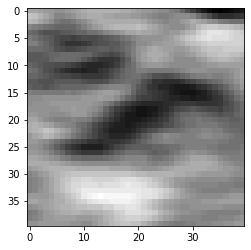

In [17]:
plt.imshow(im,cmap='gray')

## Comments on data

We see that in almost all images the STN lies between the 29th channel and 44th channel. Therefore, the rest of the channels are not of any interest to us. So roughly 10 channels contain the STN in each MRI. We have 45 MRI scans. So a total of 450 slices. We can choose around 35 patients for training and 10 for validation

# Create Training Slices

In [7]:
# Normalize image
def normalizeImageIntensityRange(img):
    
    max_intensity = np.max(img)
    min_intensity = np.min(img)
    
    return (img - min_intensity) / (max_intensity - min_intensity)



In [8]:
# Save volume slice to file


In [9]:
train_dir = 'Training/'

train_dir_slices = os.path.join(train_dir,'slices/imgs')
train_dir_masks = os.path.join(train_dir,'masks/imgs')



In [10]:
val_dir = 'Validation/'

val_dir_slices = os.path.join(val_dir,'slices/imgs/')
val_dir_masks = os.path.join(val_dir,'masks/imgs')



In [11]:
test_dir = 'Testing/'

test_dir_slices = os.path.join(test_dir,'slices/imgs/')
test_dir_masks = os.path.join(test_dir,'masks/imgs')



In [199]:
for i in range(25):
    
    img = nib.load(os.path.join(mri_path,patients[i])).get_fdata()
    left_mask = nib.load(os.path.join(left_stn_path,patients[i])).get_fdata()
    right_mask = nib.load(os.path.join(right_stn_path,patients[i])).get_fdata()
    
    n_img = normalizeImageIntensityRange(img)
    
    mask = left_mask + 2*right_mask
    
    _,_,c = np.where(mask!=0)
    
    
        
    
    for j in range(min(c),max(c)+1):
                
        saveSlice(n_img[:,:,j],str(patients[i])+'_slice_'+str(j),train_dir_slices)
        
        saveSlice(mask[:,:,j],str(patients[i])+'_slice_'+str(j),train_dir_masks,mask=True)
            
    
    
    

In [212]:
for i in range(25,35):
    
    img = nib.load(os.path.join(mri_path,patients[i])).get_fdata()
    left_mask = nib.load(os.path.join(left_stn_path,patients[i])).get_fdata()
    right_mask = nib.load(os.path.join(right_stn_path,patients[i])).get_fdata()
    
    n_img = normalizeImageIntensityRange(img)
    
    mask = left_mask + 2*right_mask
    
    _,_,c = np.where(mask!=0)
            
    
    for j in range(min(c),max(c)+1):
                
        saveSlice(n_img[:,:,j],str(patients[i])+'_slice_'+str(j),val_dir_slices)
        
        saveSlice(mask[:,:,j],str(patients[i])+'_slice_'+str(j),val_dir_masks,mask=True)
            
    
    
    

In [213]:
for i in range(35,45):
    
    img = nib.load(os.path.join(mri_path,patients[i])).get_fdata()
    left_mask = nib.load(os.path.join(left_stn_path,patients[i])).get_fdata()
    right_mask = nib.load(os.path.join(right_stn_path,patients[i])).get_fdata()
    
    n_img = normalizeImageIntensityRange(img)
    
    mask = left_mask + 2*right_mask
    
    _,_,c = np.where(mask!=0)
            
    
    for j in range(min(c),max(c)+1):
                
        saveSlice(n_img[:,:,j],str(patients[i])+'_slice_'+str(j),test_dir_slices)
        
        saveSlice(mask[:,:,j],str(patients[i])+'_slice_'+str(j),test_dir_masks,mask=True)
    
    
    
    

In [218]:
mask_1=cv2.imread('Validation/masks/imgs/DT8351.img_slice_34.png',0)

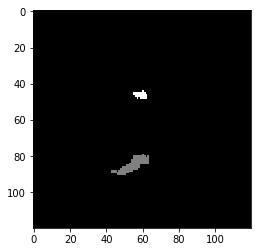

In [219]:
plt.imshow(mask_1,cmap='gray')

# Train and Validation Loader

In [12]:

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow import keras

In [13]:
def create_segmentation_generator_train(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255,
#                      featurewise_center=True,
#                      featurewise_std_normalization=True,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      zoom_range=0.3
                        )
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return (pair for pair in zip(img_generator, msk_generator))



In [14]:
# Remember not to perform any image augmentation in the test generator!
def create_segmentation_generator_test(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255)
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return (pair for pair in zip(img_generator, msk_generator))


In [15]:
IMG_SIZE = (40,40)
BATCH_SIZE = 4
SEED = 2
NUM_TRAIN = 386
NUM_TEST = 158

In [16]:
train_generator = create_segmentation_generator_train('Training/slices/', 'Training/masks/', BATCH_SIZE)

Found 386 images belonging to 2 classes.
Found 386 images belonging to 2 classes.


In [17]:
val_generator = create_segmentation_generator_test('Validation/slices/', 'Validation/masks/', 4)

Found 158 images belonging to 2 classes.
Found 158 images belonging to 2 classes.


In [18]:
test_generator = create_segmentation_generator_test('Testing/slices/','Testing/masks/',4)

Found 166 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [19]:
def display(display_list):
    plt.figure(figsize=(15,15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap='gray')
    plt.show()

In [20]:

def show_dataset(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        display([image[0], mask[0]])

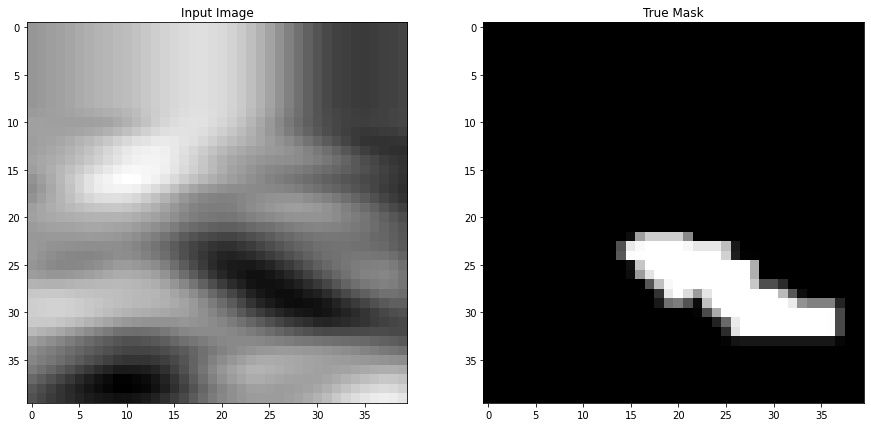

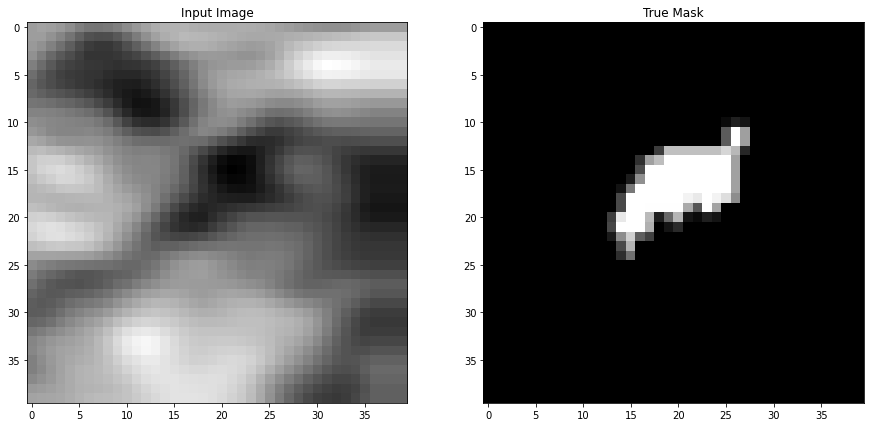

In [21]:
show_dataset(train_generator, 2)


In [22]:
from keras import backend as K

def dice_coefficient(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coefficient_loss(y_true, y_pred):
    return -dice_coefficient(y_true, y_pred)

Using TensorFlow backend.


In [23]:
def unet(n_levels, initial_features=32, n_blocks=2, kernel_size=3, pooling_size=2, in_channels=1, out_channels=1):
    inputs = keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, in_channels))
    x = inputs
    
    convpars = dict(kernel_size=kernel_size, activation='relu', padding='same')
    
    #downstream
    skips = {}
    for level in range(n_levels):
        for _ in range(n_blocks):
            x = keras.layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
        if level < n_levels - 1:
            skips[level] = x
            x = keras.layers.MaxPool2D(pooling_size)(x)
            
    # upstream
    for level in reversed(range(n_levels-1)):
        x = keras.layers.Conv2DTranspose(initial_features * 2 ** level, strides=pooling_size, **convpars)(x)
        x = keras.layers.Concatenate()([x, skips[level]])
        for _ in range(n_blocks):
            x = keras.layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
            
    # output
    activation = 'sigmoid' if out_channels == 1 else 'softmax'
    x = keras.layers.Conv2D(out_channels, kernel_size=1, activation=activation, padding='same')(x)
        
    return keras.Model(inputs=[inputs], outputs=[x], name=f'UNET-L{n_levels}-F{initial_features}')

In [24]:
IMAGE_HEIGHT=40
IMAGE_WIDTH = 40
NUM_OF_EPOCHS = 10
BATCH_SIZE = 4


In [57]:
EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE
EPOCH_STEP_TEST = NUM_TEST // BATCH_SIZE

model = unet(4)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "UNET-L4-F32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 40, 40, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 40, 40, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 40, 40, 32)   9248        conv2d_30[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 20, 20, 32)   0           conv2d_31[0][0]                  
________________________________________________________________________________________

In [60]:
history=model.fit_generator(generator=train_generator, 
                    steps_per_epoch=EPOCH_STEP_TRAIN, 
                    validation_data=val_generator, 
                    validation_steps=EPOCH_STEP_TEST,
                   epochs=40)

Epoch 1/40
96/96 [==============================] - 12s 127ms/step - loss: 0.1295 - accuracy: 0.9342 - val_loss: 0.1056 - val_accuracy: 0.9579
Epoch 2/40
96/96 [==============================] - 12s 127ms/step - loss: 0.1216 - accuracy: 0.9356 - val_loss: 0.0960 - val_accuracy: 0.9617
Epoch 3/40
96/96 [==============================] - 13s 138ms/step - loss: 0.1147 - accuracy: 0.9357 - val_loss: 0.0975 - val_accuracy: 0.9597
Epoch 4/40
96/96 [==============================] - 20s 212ms/step - loss: 0.1135 - accuracy: 0.9387 - val_loss: 0.1020 - val_accuracy: 0.9574
Epoch 5/40
96/96 [==============================] - 20s 203ms/step - loss: 0.1064 - accuracy: 0.9393 - val_loss: 0.0906 - val_accuracy: 0.9619
Epoch 6/40
96/96 [==============================] - 16s 171ms/step - loss: 0.1065 - accuracy: 0.9401 - val_loss: 0.0843 - val_accuracy: 0.9634
Epoch 7/40
96/96 [==============================] - 13s 140ms/step - loss: 0.1047 - accuracy: 0.9392 - val_loss: 0.0815 - val_accuracy: 0.9637

In [61]:
model.save(f'UNET_MRI_June22_val_dice_coeff_0.6.h5')


In [25]:
test_generator = create_segmentation_generator_test('Testing/slices/', 'Testing/masks/', 1)


Found 166 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [26]:
from tensorflow import keras

In [27]:
model = keras.models.load_model('UNET_MRI_June22_val_dice_coeff_0.6.h5')

In [28]:
def show_prediction(datagen, num=1):
    for i in range(0,num):
        

        image,mask = next(datagen)
        
        pred_mask = model.predict(image)[0] > 0.5
        
        display([image[0], mask[0], pred_mask])

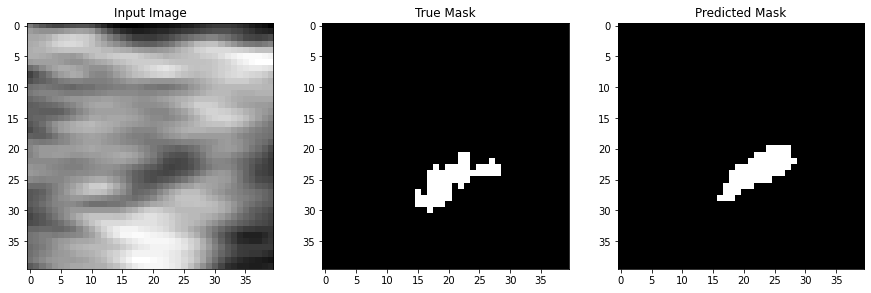

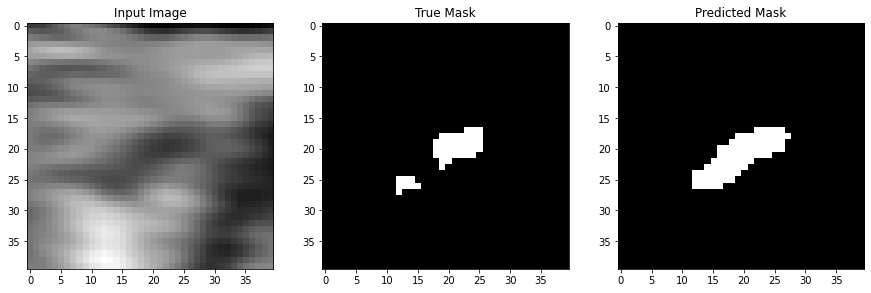

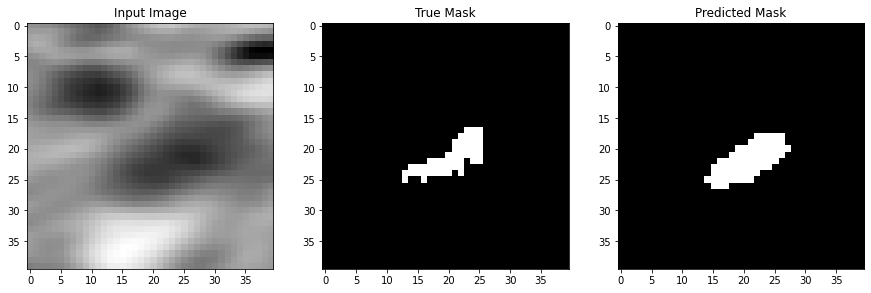

In [29]:
show_prediction(test_generator, 3)


## Volume Segmentation and Prediction

In [44]:
pred_image1 = nib.load('data/mri_crop/BG0796.img').get_fdata()

In [45]:
pred_left_mask1 = nib.load('data/mask_left/BG0796.img').get_fdata()

In [46]:
pred_right_mask1 = nib.load('data/mask_right/BG0796.img').get_fdata()

In [47]:
pred_image1 = normalizeImageIntensityRange(pred_image1)

In [48]:

plt.figure(figsize=(20,20))
i=1

new_out = np.zeros((120,120,120))
for z in range(25,45):
    
    
    for h in range(0,90,10):
        
        for w in range(0,90,10):
            sub_image = pred_image1[h:h+40,w:w+40,z].reshape(-1,40,40,1)
            
            sub_image = normalizeImageIntensityRange(sub_image)
            
            prediction = model.predict(sub_image)[0]>0.8
            
            new_out[h:h+40,w:w+40,z]+= prediction[:,:,0]
            
            #plt.imshow(prediction[:,:,0],cmap='gray')
            #print(np.sum(prediction))
            #fewrf
            i+=1
    #print("Slices in one slice is ",i)
print("Total slices is :",i)


Total slices is : 1621


<Figure size 1440x1440 with 0 Axes>

In [49]:
new = normalizeImageIntensityRange(new_out)

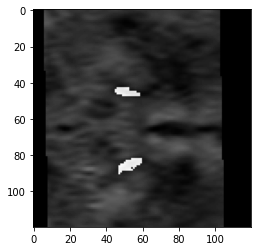

In [50]:
plt.imshow(pred_image1[:,:,35]+pred_left_mask1[:,:,35]+pred_right_mask1[:,:,35],cmap='gray')

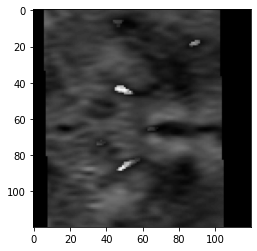

In [51]:
plt.imshow(pred_image1[:,:,35]+new[:,:,35],cmap='gray')

In [67]:
pred_image1.shape

(120, 120, 120)

In [69]:
view_img(pred_image1)


TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
0.0

In [86]:
import webbrowser
webbrowser.open_new_tab('chrome://newtab')

True

In [38]:
import pandas as pd

In [56]:
my_widget = NiftiWidget(nib.load('data/mri_crop/BG0796.img'))
my_widget.nifti_plotter(colormap='gray')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=59, continuous_update=False, description='x', max=119), IntSlider(value=…

In [60]:
my_widget = NiftiWidget(nib.dataobj_images.DataobjImage(pred_image1+2*pred_left_mask1+2*pred_right_mask1))
my_widget.nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=59, continuous_update=False, description='x', max=119), IntSlider(value=…

In [59]:
my_widget = NiftiWidget(nib.dataobj_images.DataobjImage(pred_image1+2*new))
my_widget.nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=59, continuous_update=False, description='x', max=119), IntSlider(value=…

In [503]:
from skimage.measure import marching_cubes_lewiner


In [535]:
vertices,faces,_,_ = marching_cubes(pred_image1)


In [536]:
import meshplot as mp
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import webbrowser


In [550]:
mp.plot(vertices, faces,return_plot=False)



Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(59.5, 47.…

In [534]:
type(p)

meshplot.Viewer.Viewer

In [565]:
import fsleyes

In [ ]:
%gui wx


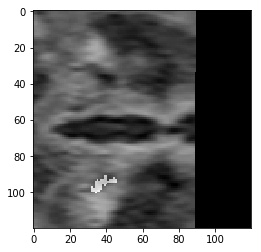

In [408]:
plt.imshow(pred_image1[:,:,36]+100/255*pred_left_mask1[:,:,36],cmap='gray')

In [323]:
y=model.predict(normalizeImageIntensityRange(pred_image1[60:100,20:60,33].reshape(-1,40,40,1)))

In [329]:
y[y<0.5]=0
y[y>0.5]=1

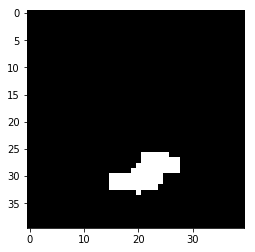

In [335]:
plt.imshow(y[0,:,:,0],cmap='gray')

In [542]:
%matplo

In [551]:
import tempfile

# Create a temporary directory
d = tempfile.mkdtemp()

In [76]:
!pip install vtkplotter

     |████████████████████████████████| 18.4 MB 1.4 MB/s eta 0:00:01     |██████████████████████████▍     | 15.2 MB 1.7 MB/s eta 0:00:02
     |████████████████████████████████| 80.6 MB 183 kB/s eta 0:00:01     |███████████████                 | 37.6 MB 1.7 MB/s eta 0:00:26     |███████████████                 | 37.9 MB 1.6 MB/s eta 0:00:27     |████████████████▏               | 40.8 MB 1.7 MB/s eta 0:00:24     |██████████████████▉             | 47.3 MB 1.4 MB/s eta 0:00:25
  Created wheel for vtkplotter: filename=vtkplotter-2020.3.1-py3-none-any.whl size=18588853 sha256=45124cf3f6eeaee976ed51df9f01674dddff63bc4c05b5d7fc9d40ec5eca6232
  Stored in directory: /Users/dhruv/Library/Caches/pip/wheels/dd/ac/6d/ecdc8175ed64eb353a8f7cb7de8780103c55eaae75c770c16f
Successfully built vtkplotter


In [83]:
!pip install scikit-image

  Using cached scikit_image-0.17.2-cp37-cp37m-macosx_10_13_x86_64.whl (12.1 MB)
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Using cached tifffile-2020.6.3-py3-none-any.whl (133 kB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-macosx_10_9_x86_64.whl (4.3 MB)
     |████████████████████████████████| 3.3 MB 4.2 MB/s eta 0:00:01


In [87]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from skimage import measure

def plot_3d(image, threshold=0): 
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [88]:
new.shape

(120, 120, 120)

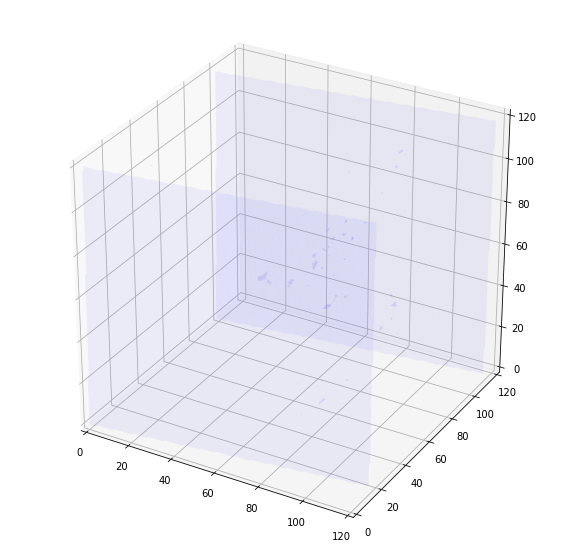

In [90]:
plot_3d(pred_image1+new)